In [1]:
import numpy as np
from minisom import MiniSom
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

1. SOM

In [2]:
csv_file_path = "PokemonDB.csv"
dataframe = pd.read_csv(csv_file_path)

In [3]:
selected_features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = dataframe[selected_features].values

In [4]:
map_size = (5, 5)  # SOM 맵의 크기
input_len = X.shape[1]  # 입력 데이터의 길이
som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.3, learning_rate=0.5)


In [5]:
som.train_batch(X, 100000)

In [6]:
cluster_labels = np.zeros(len(X), dtype=int)
for i, x in enumerate(X):
    w = som.winner(x)
    cluster_labels[i] = np.ravel_multi_index(w, map_size)

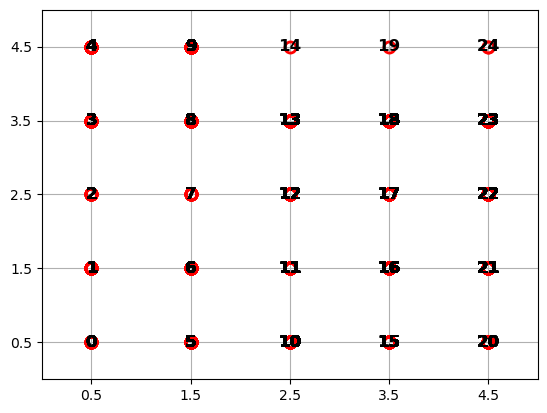

In [7]:
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None',
             markeredgecolor='red', markersize=8, markeredgewidth=2)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(cluster_labels[i]),
             color='black', fontdict={'weight': 'bold', 'size': 12},
             horizontalalignment='center', verticalalignment='center')
    # 격자 유닛의 좌표 설정
plt.xticks(np.arange(0.5, map_size[0], 1))
plt.yticks(np.arange(0.5, map_size[1], 1))
plt.xlim([0, map_size[0]])
plt.ylim([0, map_size[1]])
plt.grid(True)

# 시각화 결과 출력
plt.show()

In [8]:
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(dataframe.iloc[i]["Name"])

In [9]:
for label, pokemon_list in clusters.items():
    print(f"Cluster {label}:")
    for pokemon in pokemon_list:
        print(pokemon)
    print()

Cluster 10:
Bulbasaur
Squirtle
Clefairy
Vulpix
Vulpix
Oddish
Psyduck
Abra
Tentacool
Magnemite
Seel
Drowzee
Exeggcute
Porygon
Omanyte
Chikorita
Ledyba
Cleffa
Togepi
Mareep
Flaaffy
Slugma
Houndour
Smoochum
Torchic
Lotad
Lombre
Kirlia
Shroomish
Numel
Spoink
Swablu
Baltoy
Lileep
Spheal
Clamperl
Piplup
Budew
Cherubi
Shellos
Chingling
Mime Jr.
Mantyke
Snover
Munna
Petilil
Yamask
Zorua
Gothita
Gothorita
Solosis
Duosion
Vanillite
Foongus
Frillish
Elgyem
Litwick
Lampent
Fennekin
Flabébé
Floette
Spritzee
Swirlix
Skrelp
Clauncher
Goomy
Popplio
Dewpider
Morelull
Sandygast
Dottler
Gossifleur
Yamper
Rolycoly
Sinistea
Hatenna
Hattrem
Milcery
Fuecoco
Smoliv
Dolliv
Tadbulb
Toedscool
Glimmet
Gimmighoul

Cluster 18:
Ivysaur
Charmeleon
Wartortle
Butterfree
Beedrill
Raticate
Arbok
Nidorina
Golbat
Gloom
Poliwhirl
Machoke
Weepinbell
Farfetch'd
Farfetch'd
Dewgong
Hypno
Hitmonchan
Seadra
Seaking
Eevee
Dragonair
Bayleef
Quilava
Croconaw
Noctowl
Ledian
Ariados
Azumarill
Yanma
Misdreavus
Dunsparce
Gligar
Magby
Pu

DBSCAN

In [10]:
# 필요한 attribute 선택
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = dataframe[attributes].values

In [11]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# 차원 축소 (여기서는 PCA 사용)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.62736252,  0.00826117],
       [-0.44525228, -0.06455318],
       [ 1.18432175, -0.13653741],
       ...,
       [ 1.81191189, -1.35573739],
       [ 2.98216353, -0.5764798 ],
       [ 3.01565282, -1.28025314]])

In [13]:
# DBSCAN 모델 생성 및 군집화
dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan.fit(X_pca)

DBSCAN(eps=0.7, min_samples=4)

In [14]:
# 군집 결과 확인
labels = dbscan.labels_
dataframe['Cluster'] = labels

In [15]:
# 결과 출력

dataframe[['Name', 'Cluster']]

,Name,Cluster
0,Bulbasaur,0
1,Ivysaur,0
2,Venusaur,0
3,Venusaur,0
4,Charmander,0
...,...,...
1185,Chi-Yu,0
1186,Roaring Moon,0
1187,Iron Valiant,0
1188,Koraidon,0


In [16]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the data
data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

# Set the range of cluster numbers to evaluate
min_clusters = 1
max_clusters = 10

# Initialize variables
best_bic = float('inf')
best_n_components = -1

# Iterate over different cluster numbers
for n_components in range(min_clusters, max_clusters+1):
    # Create and train GMM model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(stats)

    # Calculate BIC
    bic = gmm.bic(stats)

    # Update best BIC and number of components if necessary
    if bic < best_bic:
        best_bic = bic
        best_n_components = n_components

# Print the best number of components
print("Best number of components:", best_n_components)

Best number of components: 6


In [17]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the data
data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

# Set the range of cluster numbers to evaluate
min_clusters = 1
max_clusters = 10

# Initialize variables
best_aic = float('inf')
best_n_components = -1

# Iterate over different cluster numbers
for n_components in range(min_clusters, max_clusters+1):
    # Create and train GMM model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(stats)

    # Calculate AIC
    aic = gmm.aic(stats)

    # Update best AIC and number of components if necessary
    if aic < best_aic:
        best_aic = aic
        best_n_components = n_components

# Print the best number of components
print("Best number of components:", best_n_components)


Best number of components: 10


In [18]:

data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

gmm = GaussianMixture(n_components=4)  # Set the number of clusters
gmm.fit(stats)

GaussianMixture(n_components=4)

/Users/hanyoungwook/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hanyoungwook/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


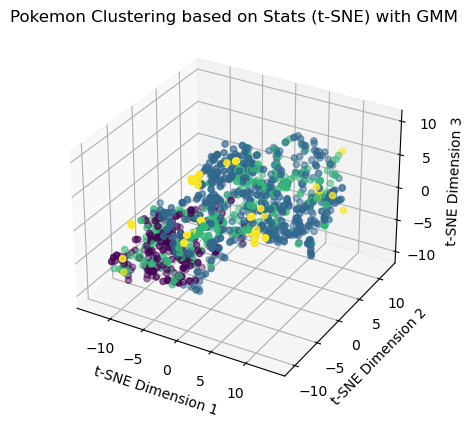

In [19]:
cluster_labels = gmm.predict(stats)

# t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(stats)

# Cluster visualization in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('Pokemon Clustering based on Stats (t-SNE) with GMM')
plt.show()




In [20]:
for cluster in range(gmm.n_components):
    print(f"Cluster {cluster+1}:")
    cluster_pokemon = data.loc[cluster_labels == cluster, 'Name']
    print(cluster_pokemon)
    print()

Cluster 1:
0        Bulbasaur
1          Ivysaur
4       Charmander
5       Charmeleon
9         Squirtle
           ...    
1131        Rellor
1135     Tinkatink
1144        Varoom
1150      Greavard
1180    Gimmighoul
Name: Name, Length: 202, dtype: object

Cluster 2:
2           Venusaur
3           Venusaur
6          Charizard
7          Charizard
8          Charizard
            ...     
1185          Chi-Yu
1186    Roaring Moon
1187    Iron Valiant
1188        Koraidon
1189        Miraidon
Name: Name, Length: 556, dtype: object

Cluster 3:
10         Wartortle
23           Pidgeot
24           Rattata
25           Rattata
43          Nidoran♂
            ...     
1146        Cyclizar
1160       Farigiraf
1166    Brute Bonnet
1176        Frigibax
1179      Gimmighoul
Name: Name, Length: 376, dtype: object

Cluster 4:
52      Jigglypuff
53      Wigglytuff
105       Slowpoke
106       Slowpoke
123       Cloyster
128           Onix
151        Chansey
176         Lapras
190        Sn

In [21]:
cluster_pokemon = {}
for cluster in range(gmm.n_components):
    cluster_pokemon[cluster] = data.loc[cluster_labels == cluster, 'Name']

for cluster, pokemon_list in cluster_pokemon.items():
    with open(f'cluster{cluster+1}_pokemon.txt', 'w', encoding='utf-8') as file:
        file.write(f"Cluster {cluster+1}:\n")
        for pokemon in pokemon_list:
            file.write(pokemon + '\n')